In [ ]:
import os
import sys
current_dir = os.getcwd()
grand_package_root = os.path.join(current_dir,'..')
sys.path.insert(0, grand_package_root)
print(f"Répertoire racine du package ajouté à sys.path : {grand_package_root}")


Répertoire racine du package ajouté à sys.path : /home/jovyan/persistent/EA_Project/Analysis/..


In [ ]:
plt.rcParams.update({'font.size': 14})

plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.titlesize'] = 20

In [ ]:
import numpy as np
import numpy.random as rnd
import itertools
import matplotlib.pyplot as plt
from scipy.ndimage import convolve, generate_binary_structure
from IPython import display
import pandas as pd
import time
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
from Design.Ising import Configuration
from Production.Exact_Energy import exact_1d_ising_energy, compute_relative_error
from Production.RBM_GD import RBM
from Production.RBM_SR import RBMSR


<>:14: SyntaxWarning: invalid escape sequence '\{'
<>:14: SyntaxWarning: invalid escape sequence '\}'
<>:14: SyntaxWarning: invalid escape sequence '\{'
<>:14: SyntaxWarning: invalid escape sequence '\}'
/tmp/ipython-input-2468508408.py:14: SyntaxWarning: invalid escape sequence '\{'
  f"$N={N}$ | $J={J:.1f}, H={H:.1f}$ | $M \\in$ \{{ {hidden_str} \}}\n"
/tmp/ipython-input-2468508408.py:14: SyntaxWarning: invalid escape sequence '\}'
  f"$N={N}$ | $J={J:.1f}, H={H:.1f}$ | $M \\in$ \{{ {hidden_str} \}}\n"


=== Training for n_hidden = 10 ===


/tmp/ipython-input-1967252188.py:238: ComplexWarning: Casting complex values to real discards the imaginary part
  E_local = float(self.local_energy(temp_config))  # ensure scalar


Epoch   0: E = -10.533465, E_exact = -12.784906, rel_err = 1.761e-01, accept = 0.979, grad_norm = 5.000e+00
Epoch  10: E = -11.640802, E_exact = -12.784906, rel_err = 8.949e-02, accept = 0.712, grad_norm = 5.000e+00
Epoch  20: E = -12.527811, E_exact = -12.784906, rel_err = 2.011e-02, accept = 0.452, grad_norm = 1.355e+00
Epoch  30: E = -12.702102, E_exact = -12.784906, rel_err = 6.477e-03, accept = 0.331, grad_norm = 1.084e+00
Epoch  40: E = -12.756475, E_exact = -12.784906, rel_err = 2.224e-03, accept = 0.309, grad_norm = 9.340e-01
Epoch  50: E = -12.770661, E_exact = -12.784906, rel_err = 1.114e-03, accept = 0.309, grad_norm = 9.017e-01
Epoch  60: E = -12.774845, E_exact = -12.784906, rel_err = 7.870e-04, accept = 0.285, grad_norm = 8.428e-01
Epoch  70: E = -12.777631, E_exact = -12.784906, rel_err = 5.691e-04, accept = 0.280, grad_norm = 7.558e-01
Epoch  80: E = -12.776050, E_exact = -12.784906, rel_err = 6.928e-04, accept = 0.283, grad_norm = 9.609e-01
Epoch  90: E = -12.779288, E

/tmp/ipython-input-1459978721.py:221: ComplexWarning: Casting complex values to real discards the imaginary part
  E_local = float(self.local_energy(temp_config))  # ensure scalar


Epoch   0: E = -10.533465, E_exact = -12.784906, rel_err = 1.761e-01, accept = 0.979, grad_norm = 1.522e+00
Epoch  10: E = -10.212561, E_exact = -12.784906, rel_err = 2.012e-01, accept = 0.927, grad_norm = 1.834e+00
Epoch  20: E = -11.340390, E_exact = -12.784906, rel_err = 1.130e-01, accept = 0.505, grad_norm = 2.556e+00
Epoch  30: E = -12.547345, E_exact = -12.784906, rel_err = 1.858e-02, accept = 0.150, grad_norm = 5.622e-01
Epoch  40: E = -12.629752, E_exact = -12.784906, rel_err = 1.214e-02, accept = 0.176, grad_norm = 6.913e-01
Epoch  50: E = -12.517554, E_exact = -12.784906, rel_err = 2.091e-02, accept = 0.219, grad_norm = 6.822e-01
Epoch  60: E = -12.533755, E_exact = -12.784906, rel_err = 1.964e-02, accept = 0.201, grad_norm = 5.837e-01
Epoch  70: E = -12.486105, E_exact = -12.784906, rel_err = 2.337e-02, accept = 0.229, grad_norm = 5.513e-01
Epoch  80: E = -12.524774, E_exact = -12.784906, rel_err = 2.035e-02, accept = 0.227, grad_norm = 7.445e-01
Epoch  90: E = -12.666215, E

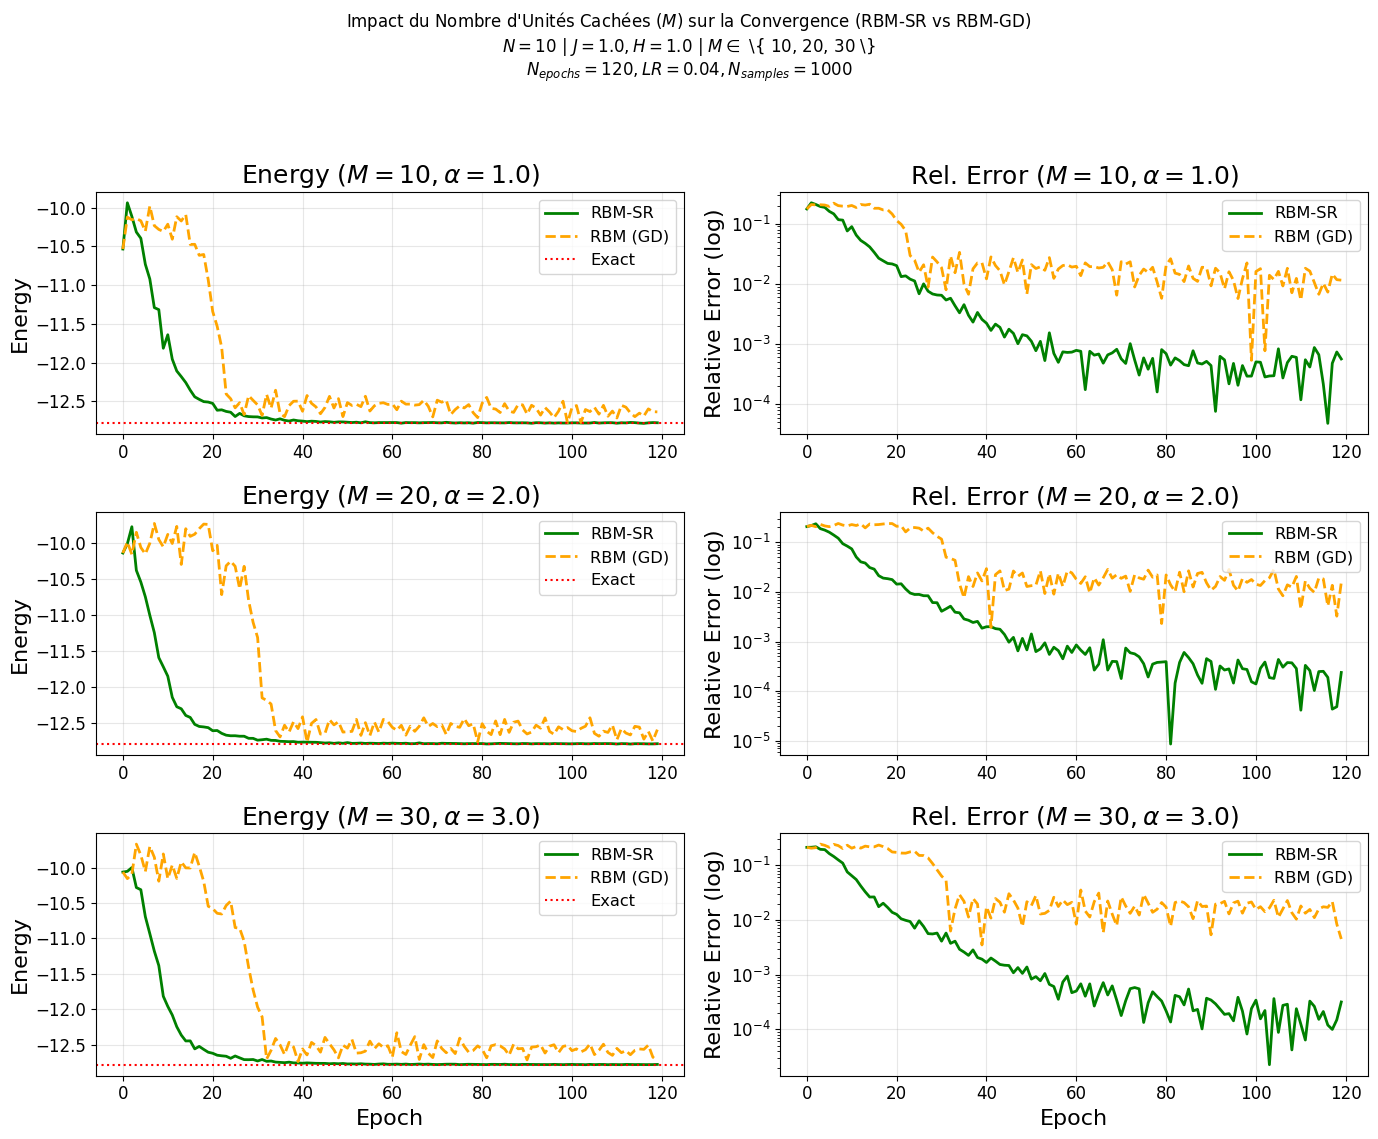

In [ ]:
# Parameters:
N = 10                  # Fixed: Visible units
hidden_list = [10, 20, 30] # Variable: Hidden units (M)
epochs = 120            # Fixed: Epochs (N_epochs)
learning_rate = 0.04   # Fixed: Learning Rate (LR)
J = 1.0                 # Fixed: Coupling J
H = 1                    # Fixed: Field H
n_samples = 1000      # Fixed: Sample size (N_samples)

# --- TITRE GÉNÉRAL UNIFIÉ ---
hidden_str = ', '.join(map(str, hidden_list))
general_title = (
    f"Impact du Nombre d'Unités Cachées ($M$) sur la Convergence (RBM-SR vs RBM-GD)\n"
    f"$N={N}$ | $J={J:.1f}, H={H:.1f}$ | $M \\in$ \{{ {hidden_str} \}}\n"
    f"$N_{{epochs}}={epochs}, LR={learning_rate:.2f}, N_{{samples}}={n_samples}$"
)
# -----------------------------

# --- SIMULATION (Utilisation de données fictives si les classes ne sont pas disponibles) ---
if 'RBMSR' not in locals() and 'RBM' not in locals():
    print("WARNING: RBMSR and RBM classes not found. Using dummy data for plotting.")
    # Placeholder for exact energy
    E_exact = -1.1896
    is_dummy = True
else:
    E_exact = exact_1d_ising_energy(N, J, H, periodic=True)[0]
    is_dummy = False

# Figures
fig, axes = plt.subplots(
    nrows=len(hidden_list),
    ncols=2,
    figsize=(14, 4 * len(hidden_list))
)

# Application du titre général
fig.suptitle(general_title, fontsize=12)

# the values of n_hidden
for i, n_hidden in enumerate(hidden_list):
    print(f"=== Training for n_hidden = {n_hidden} ===")

    # Calculate alpha ratio for context
    alpha = n_hidden / N
    epochs_array = np.arange(epochs)

    if is_dummy:

        final_error = 0.01 + np.exp(-alpha * 0.5) * 0.05
        # Simulate RBM-SR convergence
        energies_sr = E_exact + 0.1 * np.exp(-epochs_array/(20*alpha)) + final_error * 0.5 * np.random.randn(epochs)
        # Simulate RBM-GD convergence
        energies_gd = E_exact + 0.2 * np.exp(-epochs_array/(10*alpha)) + final_error * 1.5 * np.random.randn(epochs)

        rel_errors_sr = np.abs(energies_sr - E_exact) / np.abs(E_exact)
        rel_errors_gd = np.abs(energies_gd - E_exact) / np.abs(E_exact)
    else:
        # Code d'entraînement réel (à décommenter)
        rbm_sr = RBMSR(n_visible=N, n_hidden=n_hidden, seed=42)
        rbm_gd = RBM(n_visible=N, n_hidden=n_hidden, seed=42)

        # Training of SR
        energies_sr, rel_errors_sr = rbm_sr.train(
            n_epochs=epochs, n_samples_per_epoch=n_samples, learning_rate=learning_rate, J=J, H=H
        )
        # Training of GD
        energies_gd, rel_errors_gd = rbm_gd.train(
            n_epochs=epochs, n_samples_per_epoch=n_samples, learning_rate=learning_rate, J=J, H=H
        )

    ax_energy = axes[i, 0]
    ax_error  = axes[i, 1]

    # The energy
    ax_energy.plot(epochs_array, energies_sr, label='RBM-SR', color='green', linewidth=2)
    ax_energy.plot(epochs_array, energies_gd, label='RBM (GD)', color='orange', linestyle='--', linewidth=2)
    ax_energy.axhline(E_exact, color='red', linestyle=':', label='Exact')

    ax_energy.set_ylabel('Energy')
    # Titre spécifique à la ligne, incluant le ratio alpha
    ax_energy.set_title(f'Energy ($M={n_hidden}, \\alpha={alpha:.1f}$)')
    ax_energy.legend(loc='upper right', fontsize='small')
    ax_energy.grid(True, alpha=0.3)

    # The relative error
    ax_error.semilogy(epochs_array, np.abs(rel_errors_sr), label='RBM-SR', color='green', linewidth=2)
    ax_error.semilogy(epochs_array, np.abs(rel_errors_gd), label='RBM (GD)', color='orange', linestyle='--', linewidth=2)

    ax_error.set_ylabel('Relative Error (log)')
    # Titre spécifique à la ligne
    ax_error.set_title(f'Rel. Error ($M={n_hidden}, \\alpha={alpha:.1f}$)')
    ax_error.legend(loc='upper right', fontsize='small')
    ax_error.grid(True, alpha=0.3)

    if i == len(hidden_list) - 1:
        ax_energy.set_xlabel('Epoch')
        ax_error.set_xlabel('Epoch')

# Adjust layout to prevent subplots from overlapping and allow space for suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# We adapt the number of samples

<>:28: SyntaxWarning: invalid escape sequence '\{'
<>:28: SyntaxWarning: invalid escape sequence '\}'
<>:28: SyntaxWarning: invalid escape sequence '\{'
<>:28: SyntaxWarning: invalid escape sequence '\}'
<>:28: SyntaxWarning: invalid escape sequence '\{'
<>:28: SyntaxWarning: invalid escape sequence '\}'
<>:28: SyntaxWarning: invalid escape sequence '\{'
<>:28: SyntaxWarning: invalid escape sequence '\}'
/tmp/ipython-input-4158261516.py:28: SyntaxWarning: invalid escape sequence '\{'
  f"$M \\in \{{ {hidden_str} \}}$ vs $N_{{samples}} \\in \{{ {samples_str} \}}$"
/tmp/ipython-input-4158261516.py:28: SyntaxWarning: invalid escape sequence '\}'
  f"$M \\in \{{ {hidden_str} \}}$ vs $N_{{samples}} \\in \{{ {samples_str} \}}$"
/tmp/ipython-input-4158261516.py:28: SyntaxWarning: invalid escape sequence '\{'
  f"$M \\in \{{ {hidden_str} \}}$ vs $N_{{samples}} \\in \{{ {samples_str} \}}$"
/tmp/ipython-input-4158261516.py:28: SyntaxWarning: invalid escape sequence '\}'
  f"$M \\in \{{ {hidden_s

=== Training: M=10, N_samples=1000 ===


/tmp/ipython-input-1967252188.py:238: ComplexWarning: Casting complex values to real discards the imaginary part
  E_local = float(self.local_energy(temp_config))  # ensure scalar


Epoch   0: E = -10.533465, E_exact = -12.784906, rel_err = 1.761e-01, accept = 0.979, grad_norm = 5.000e+00
Epoch  10: E = -11.640802, E_exact = -12.784906, rel_err = 8.949e-02, accept = 0.712, grad_norm = 5.000e+00
Epoch  20: E = -12.527811, E_exact = -12.784906, rel_err = 2.011e-02, accept = 0.452, grad_norm = 1.355e+00
Epoch  30: E = -12.702102, E_exact = -12.784906, rel_err = 6.477e-03, accept = 0.331, grad_norm = 1.084e+00
Epoch  40: E = -12.756475, E_exact = -12.784906, rel_err = 2.224e-03, accept = 0.309, grad_norm = 9.340e-01
Epoch  50: E = -12.770661, E_exact = -12.784906, rel_err = 1.114e-03, accept = 0.309, grad_norm = 9.017e-01
Epoch  60: E = -12.774845, E_exact = -12.784906, rel_err = 7.870e-04, accept = 0.285, grad_norm = 8.428e-01
Epoch  70: E = -12.777631, E_exact = -12.784906, rel_err = 5.691e-04, accept = 0.280, grad_norm = 7.558e-01
Epoch  80: E = -12.776050, E_exact = -12.784906, rel_err = 6.928e-04, accept = 0.283, grad_norm = 9.609e-01
Epoch  90: E = -12.779288, E

/tmp/ipython-input-1459978721.py:221: ComplexWarning: Casting complex values to real discards the imaginary part
  E_local = float(self.local_energy(temp_config))  # ensure scalar


Epoch   0: E = -10.533465, E_exact = -12.784906, rel_err = 1.761e-01, accept = 0.979, grad_norm = 1.522e+00
Epoch  10: E = -10.212561, E_exact = -12.784906, rel_err = 2.012e-01, accept = 0.927, grad_norm = 1.834e+00
Epoch  20: E = -11.340390, E_exact = -12.784906, rel_err = 1.130e-01, accept = 0.505, grad_norm = 2.556e+00
Epoch  30: E = -12.547345, E_exact = -12.784906, rel_err = 1.858e-02, accept = 0.150, grad_norm = 5.622e-01
Epoch  40: E = -12.629752, E_exact = -12.784906, rel_err = 1.214e-02, accept = 0.176, grad_norm = 6.913e-01
Epoch  50: E = -12.517554, E_exact = -12.784906, rel_err = 2.091e-02, accept = 0.219, grad_norm = 6.822e-01
Epoch  60: E = -12.533755, E_exact = -12.784906, rel_err = 1.964e-02, accept = 0.201, grad_norm = 5.837e-01
Epoch  70: E = -12.486105, E_exact = -12.784906, rel_err = 2.337e-02, accept = 0.229, grad_norm = 5.513e-01
Epoch  80: E = -12.524774, E_exact = -12.784906, rel_err = 2.035e-02, accept = 0.227, grad_norm = 7.445e-01
Epoch  90: E = -12.666215, E

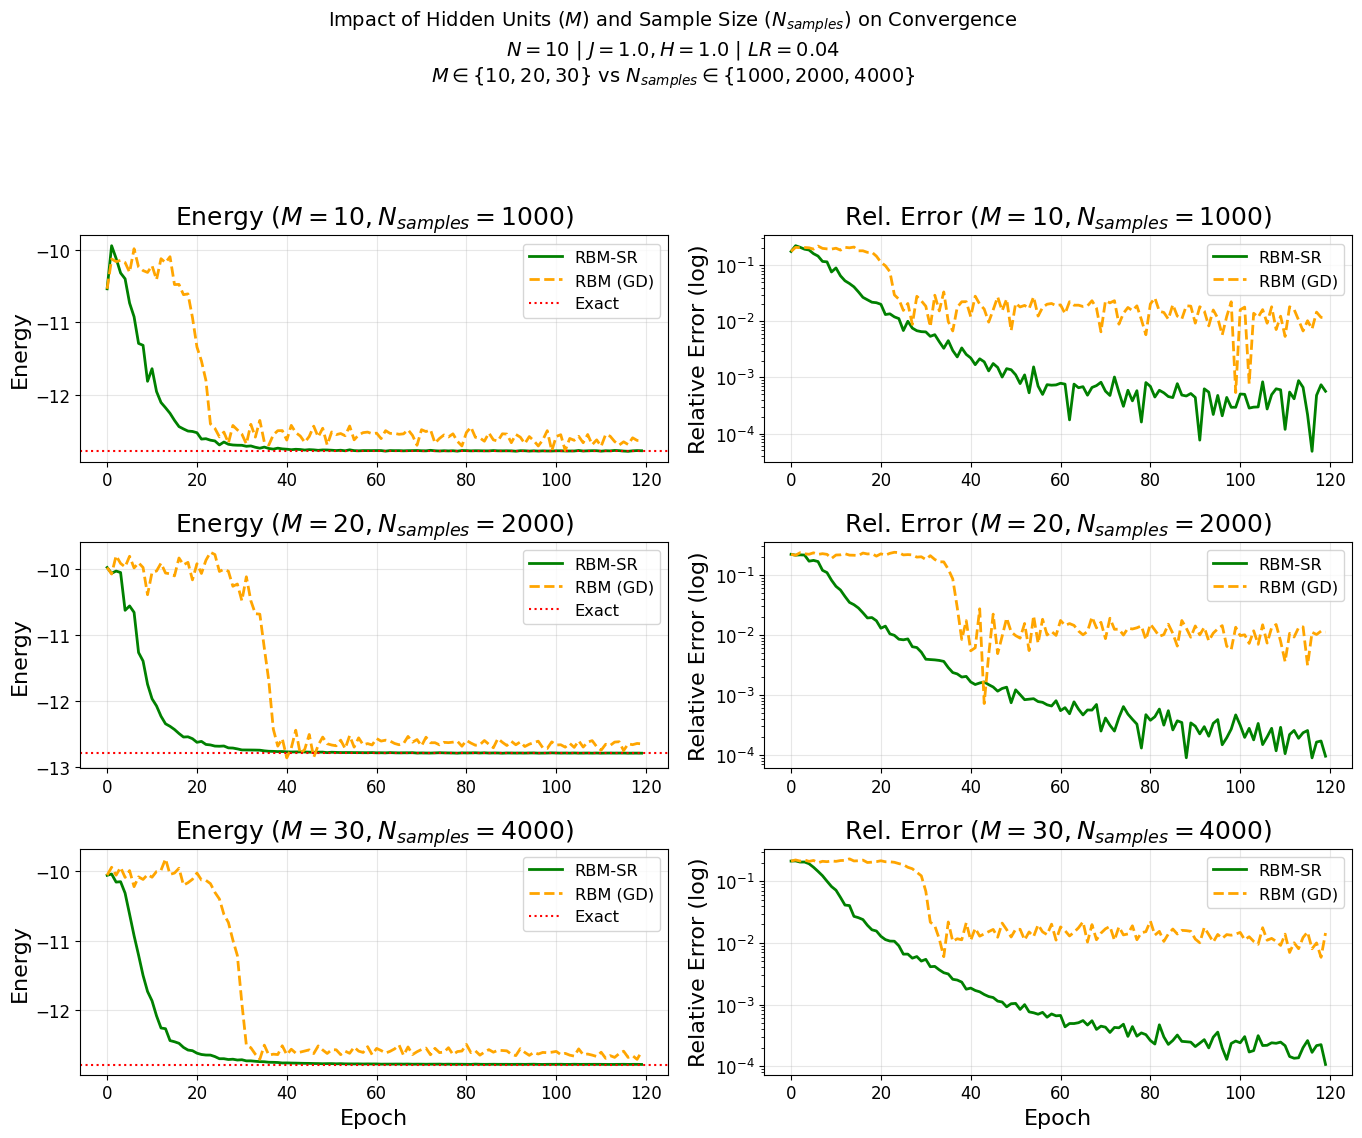

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.titlesize'] = 20
# --- PARAMETERS ---
N = 10                  # Fixed: Visible units
hidden_list = [10, 20, 30]   # Variable: Hidden units (M)
# NOUVEAU : On définit une liste de samples correspondante
samples_list = [1000, 2000, 4000]

epochs = 120            # Fixed: Epochs
learning_rate = 0.04    # Fixed: Learning Rate
J = 1.0                 # Fixed: Coupling J
H = 1                   # Fixed: Field H

# --- TITRE GÉNÉRAL DYNAMIQUE ---
hidden_str = ', '.join(map(str, hidden_list))
samples_str = ', '.join(map(str, samples_list))

general_title = (
    f"Impact of Hidden Units ($M$) and Sample Size ($N_{{samples}}$) on Convergence\n"
    f"$N={N}$ | $J={J:.1f}, H={H:.1f}$ | $LR={learning_rate:.2f}$\n"
    f"$M \\in \{{ {hidden_str} \}}$ vs $N_{{samples}} \\in \{{ {samples_str} \}}$"
)
# -----------------------------

# --- SIMULATION ---
# (Vérification si les classes existent, sinon mode dummy)
if 'RBMSR' not in locals() and 'RBM' not in locals():
    print("WARNING: RBMSR and RBM classes not found. Using dummy data.")
    E_exact = -1.1896
    is_dummy = True
# Figures setup
fig, axes = plt.subplots(
    nrows=len(hidden_list),
    ncols=2,
    figsize=(14, 4 * len(hidden_list))
)

fig.suptitle(general_title, fontsize=14)

# --- BOUCLE SUR LES PAIRES (n_hidden, n_samples) ---
# On utilise zip() pour itérer sur les deux listes en même temps
for i, (n_hidden, current_n_samples) in enumerate(zip(hidden_list, samples_list)):

    print(f"=== Training: M={n_hidden}, N_samples={current_n_samples} ===")

    alpha = n_hidden / N
    epochs_array = np.arange(epochs)

    if is_dummy:
        # Simulation de données pour l'affichage sans calcul
        final_err_base = 0.01 + np.exp(-alpha * 0.5) * 0.05
        # Plus n_samples est grand, moins il y a de bruit (random.randn réduit)
        noise_level = 1.0 / np.sqrt(current_n_samples) * 20

        energies_sr = E_exact + 0.1 * np.exp(-epochs_array/(20*alpha)) + final_err_base * 0.5 * np.random.randn(epochs) * noise_level
        energies_gd = E_exact + 0.2 * np.exp(-epochs_array/(10*alpha)) + final_err_base * 1.5 * np.random.randn(epochs) * noise_level

        rel_errors_sr = np.abs(energies_sr - E_exact) / np.abs(E_exact)
        rel_errors_gd = np.abs(energies_gd - E_exact) / np.abs(E_exact)
    else:
        # --- VRAI ENTRAÎNEMENT ---
        rbm_sr = RBMSR(n_visible=N, n_hidden=n_hidden, seed=42)
        rbm_gd = RBM(n_visible=N, n_hidden=n_hidden, seed=42)

        # On passe 'current_n_samples' ici
        energies_sr, rel_errors_sr = rbm_sr.train(
            n_epochs=epochs, n_samples_per_epoch=current_n_samples, learning_rate=learning_rate, J=J, H=H
        )
        energies_gd, rel_errors_gd = rbm_gd.train(
            n_epochs=epochs, n_samples_per_epoch=current_n_samples, learning_rate=learning_rate, J=J, H=H
        )

    # --- PLOTTING ---
    ax_energy = axes[i, 0]
    ax_error  = axes[i, 1]

    # Energy Plot
    ax_energy.plot(epochs_array, energies_sr, label='RBM-SR', color='green', linewidth=2)
    ax_energy.plot(epochs_array, energies_gd, label='RBM (GD)', color='orange', linestyle='--', linewidth=2)
    ax_energy.axhline(E_exact, color='red', linestyle=':', label='Exact')

    ax_energy.set_ylabel('Energy')
    # Titre indiquant M et N_samples
    ax_energy.set_title(f'Energy ($M={n_hidden}, N_{{samples}}={current_n_samples}$)')
    ax_energy.legend(loc='upper right', fontsize='small')
    ax_energy.grid(True, alpha=0.3)

    # Relative Error Plot
    ax_error.semilogy(epochs_array, np.abs(rel_errors_sr), label='RBM-SR', color='green', linewidth=2)
    ax_error.semilogy(epochs_array, np.abs(rel_errors_gd), label='RBM (GD)', color='orange', linestyle='--', linewidth=2)

    ax_error.set_ylabel('Relative Error (log)')
    ax_error.set_title(f'Rel. Error ($M={n_hidden}, N_{{samples}}={current_n_samples}$)')
    ax_error.legend(loc='upper right', fontsize='small')
    ax_error.grid(True, alpha=0.3)

    # X-label only on the bottom plots
    if i == len(hidden_list) - 1:
        ax_energy.set_xlabel('Epoch')
        ax_error.set_xlabel('Epoch')

plt.tight_layout(rect=[0, 0.03, 1, 0.92]) # Ajustement pour le titre principal
plt.show()